In [1]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
paris = pd.read_csv('paris_2.csv')

In [3]:
paris.head()

,Unnamed: 0,Unnamed: 0.1,accommodates,bedrooms,host_id,last_modified,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,log_price,month,arrondissement
0,0,0,2.0,0.0,48402938.0,2016-01-03 04:33:09.048358,3.0,Necker,0.0,56.0,0,9325859,Entire home/apt,1.748188,1,15
1,1,1,4.0,1.0,24291639.0,2016-01-03 04:33:07.037926,5.0,Gros-Caillou,4.5,112.0,11,4699157,Entire home/apt,2.049218,1,7
2,2,2,4.0,2.0,7256807.0,2016-01-03 04:33:04.911608,3.0,Chaillot,4.5,133.0,30,1338178,Entire home/apt,2.123852,1,16
3,3,3,2.0,1.0,18185261.0,2016-01-03 04:32:56.798397,2.0,Roquette,5.0,112.0,5,7352955,Entire home/apt,2.049218,1,11
4,4,4,4.0,1.0,30525314.0,2016-01-03 04:32:46.231010,1.0,Père-Lachaise,0.0,73.0,0,5878224,Entire home/apt,1.863323,1,20


In [4]:
from sklearn.linear_model import LinearRegression
X = paris.drop(['Unnamed: 0', 'Unnamed: 0.1', 'bedrooms', 'host_id', 'neighborhood', 'last_modified',
                'price', 'room_id', 'log_price'], axis=1)

In [5]:
X = pd.get_dummies(X, columns = ['room_type', 'month', 'arrondissement'])
X.columns
#X.drop(['arrondissement_20'])

Index(['accommodates', 'minstay', 'overall_satisfaction', 'reviews',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19',
       'arrondissement_20'],
      dtype='object')

In [6]:
X = X.drop(['arrondissement_20', 'room_type_Entire home/apt', 'month_1'], axis=1)

In [7]:
# fit linear regression model
lm = LinearRegression()
lm.fit(X, paris.log_price)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,accommodates,0.092498
1,minstay,0.000092
2,overall_satisfaction,-0.006082
3,reviews,-0.000149
4,room_type_Private room,-0.094099
5,room_type_Shared room,-0.252479
6,month_2,-0.003468
7,month_3,0.005613
8,month_4,0.003338
9,month_5,0.035489


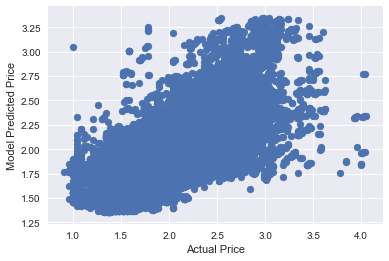

In [9]:
plt.scatter(paris.log_price, lm.predict(X))
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')

plt.show()

In [13]:
from sklearn.metrics import r2_score
y_pred = lm.predict(X)
y = paris.log_price
print(r2_score(y, y_pred))

0.515662486963


In [14]:
# use ols 
import statsmodels.api as sm
from statsmodels.formula.api import ols
X1  = X
y1 = paris.log_price

lm_crp = sm.OLS(y1, X1).fit()

print(lm_crp.summary())

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 6.167e+05
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:57:48   Log-Likelihood:            -2.1717e+05
No. Observations:              620875   AIC:                         4.344e+05
Df Residuals:                  620843   BIC:                         4.348e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

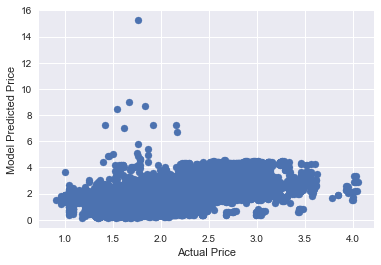

In [15]:
plt.scatter(paris.log_price, lm_crp.predict(X1))
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')

plt.show()

In [68]:
X2 = paris[['accommodates', 'reviews',  'room_type', 'overall_satisfaction', 'arrondissement']]
X2 = pd.get_dummies(X2, columns = ['room_type', 'arrondissement'])

In [71]:
X2 = X2.drop(['room_type_Entire home/apt', 'arrondissement_20'], axis=1)

In [72]:
lm_red = LinearRegression()
lm_red.fit(X2, paris.log_price)
pd.DataFrame({'features': X2.columns, 'estimatedCoefficients': lm_red.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,accommodates,0.092529
1,reviews,-0.000151
2,overall_satisfaction,-0.005996
3,room_type_Private room,-0.094253
4,room_type_Shared room,-0.252655
5,arrondissement_1,0.276078
6,arrondissement_2,0.197077
7,arrondissement_3,0.227339
8,arrondissement_4,0.269872
9,arrondissement_5,0.194822


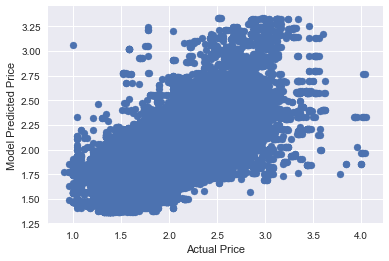

In [73]:
plt.scatter(paris.log_price, lm_red.predict(X2))
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')

plt.show()

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm_crp_red = sm.OLS(paris.log_price, X2).fit()

print(lm_crp_red.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 7.310e+05
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:29:20   Log-Likelihood:            -2.5250e+05
No. Observations:              620875   AIC:                         5.051e+05
Df Residuals:                  620851   BIC:                         5.053e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [30]:
paris.head()

,Unnamed: 0,Unnamed: 0.1,accommodates,bedrooms,host_id,last_modified,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,log_price,month,arrondissement
0,0,0,2.0,0.0,48402938.0,2016-01-03 04:33:09.048358,3.0,Necker,0.0,56.0,0,9325859,Entire home/apt,1.748188,1,15
1,1,1,4.0,1.0,24291639.0,2016-01-03 04:33:07.037926,5.0,Gros-Caillou,4.5,112.0,11,4699157,Entire home/apt,2.049218,1,7
2,2,2,4.0,2.0,7256807.0,2016-01-03 04:33:04.911608,3.0,Chaillot,4.5,133.0,30,1338178,Entire home/apt,2.123852,1,16
3,3,3,2.0,1.0,18185261.0,2016-01-03 04:32:56.798397,2.0,Roquette,5.0,112.0,5,7352955,Entire home/apt,2.049218,1,11
4,4,4,4.0,1.0,30525314.0,2016-01-03 04:32:46.231010,1.0,Père-Lachaise,0.0,73.0,0,5878224,Entire home/apt,1.863323,1,20


In [75]:
paris.loc[paris['arrondissement'] < 9, 'location'] = 'inner'
paris.loc[paris['arrondissement'] > 8, 'location'] = 'outer'


In [49]:
X3 = paris[['accommodates', 'reviews',  'room_type', 'overall_satisfaction', 'location']]
X3 = pd.get_dummies(X3, columns = ['room_type', 'location'])

In [78]:
X3 = X3.drop(['room_type_Entire home/apt', 'location_outer'], axis=1)

In [79]:
lm_red2 = LinearRegression()
lm_red2.fit(X3, paris.log_price)
pd.DataFrame({'features': X3.columns, 'estimatedCoefficients': lm_red2.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,accommodates,0.092815
1,reviews,-0.000110
2,overall_satisfaction,-0.006313
3,room_type_Private room,-0.101301
4,room_type_Shared room,-0.258547
5,location_inner,0.161368


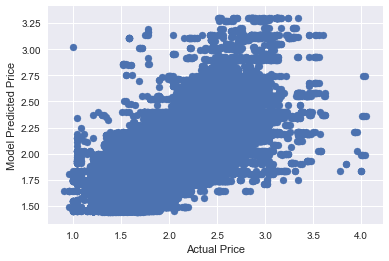

In [80]:
plt.scatter(paris.log_price, lm_red2.predict(X3))
plt.xlabel('Actual Price')
plt.ylabel('Model Predicted Price')

plt.show()

In [81]:
lm_crp_red2 = sm.OLS(paris.log_price, X3).fit()

print(lm_crp_red2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 9.388e+05
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:31:10   Log-Likelihood:            -5.8352e+05
No. Observations:              620875   AIC:                         1.167e+06
Df Residuals:                  620869   BIC:                         1.167e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

Index(['accommodates', 'minstay', 'overall_satisfaction', 'reviews',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'arrondissement_1',
       'arrondissement_2', 'arrondissement_3', 'arrondissement_4',
       'arrondissement_5', 'arrondissement_6', 'arrondissement_7',
       'arrondissement_8', 'arrondissement_9', 'arrondissement_10',
       'arrondissement_11', 'arrondissement_12', 'arrondissement_13',
       'arrondissement_14', 'arrondissement_15', 'arrondissement_16',
       'arrondissement_17', 'arrondissement_18', 'arrondissement_19',
       'arrondissement_20'],
      dtype='object')